### Here doing Data cleaning and pre processing directly because I have done it clearly and seperately line by line in 
### DataCleaning and EDA Notebook

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Function for preprocessing text data
def preprocess_text(df, text_column):
    # Lowercase the text
    df[text_column] = df[text_column].str.lower()
    
    # Remove special characters, punctuation, and symbols
    def remove_special_characters(text):
        pattern = r'[^a-zA-Z0-9\s]'  # Define regex pattern
        return re.sub(pattern, '', text)
    
    df[text_column] = df[text_column].apply(remove_special_characters)
    
    # Remove numbers
    def remove_numbers(text):
        pattern = r'\b\d+\b'  # Define regex pattern to match any standalone number
        return re.sub(pattern, '', text)
    
    df[text_column] = df[text_column].apply(remove_numbers)
    
    # Download stopwords list
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    
    # Remove stopwords
    def remove_stopwords(text):
        cleaned_text = ' '.join([word for word in text.split() if word not in stop_words])
        return cleaned_text
    
    df[text_column] = df[text_column].apply(remove_stopwords)
    
    # Tokenize text
    nltk.download('punkt')
    def tokenize_text(text):
        return word_tokenize(text)
    
    df['token'] = df[text_column].apply(tokenize_text)
    
    # Stemming
    stemmer = PorterStemmer()
    def stem_tokens(tokens):
        stemmed_tokens = [stemmer.stem(token) for token in tokens]
        return stemmed_tokens
    
    df['stemmed_token'] = df['token'].apply(stem_tokens)
    
    # Lemmatization
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    def lemmatize_tokens(tokens):
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return lemmatized_tokens
    
    df['lemmatized_token'] = df['stemmed_token'].apply(lemmatize_tokens)
    
    # Combine tokens into cleaned text
    df['cleaned_text'] = df['lemmatized_token'].apply(lambda tokens: ' '.join(tokens))
    
    return df

# Load data
data = pd.read_csv("hate.csv" , encoding='latin1')  

# Preprocess text data
data = preprocess_text(data, 'comment')


[nltk_data] Downloading package stopwords to C:\Users\Prayas
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Prayas
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Prayas
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# SVM with TF-IDF Vectorization

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['cleaned_text'])
y = data['label']

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predictions
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

# Evaluate SVM model
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
print("SVM Training Accuracy:", train_accuracy_svm)
print("SVM Test Accuracy:", test_accuracy_svm)

# Calculate precision, recall, and F1-score for SVM model on training set
train_precision_svm = precision_score(y_train, y_pred_train_svm, average='weighted')
train_recall_svm = recall_score(y_train, y_pred_train_svm, average='weighted')
train_f1_svm = f1_score(y_train, y_pred_train_svm, average='weighted')

# Calculate precision, recall, and F1-score for SVM model on test set
test_precision_svm = precision_score(y_test, y_pred_test_svm, average='weighted')
test_recall_svm = recall_score(y_test, y_pred_test_svm, average='weighted')
test_f1_svm = f1_score(y_test, y_pred_test_svm, average='weighted')

print("SVM Training Precision:", train_precision_svm)
print("SVM Test Precision:", test_precision_svm)
print("SVM Training Recall:", train_recall_svm)
print("SVM Test Recall:", test_recall_svm)
print("SVM Training F1-score:", train_f1_svm)
print("SVM Test F1-score:", test_f1_svm)


SVM Training Accuracy: 0.7565547622664439
SVM Test Accuracy: 0.679669461659983
SVM Training Precision: 0.7554623768172223
SVM Test Precision: 0.6788752432401377
SVM Training Recall: 0.7565547622664439
SVM Test Recall: 0.679669461659983
SVM Training F1-score: 0.7558656447535586
SVM Test F1-score: 0.6791051235271659


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


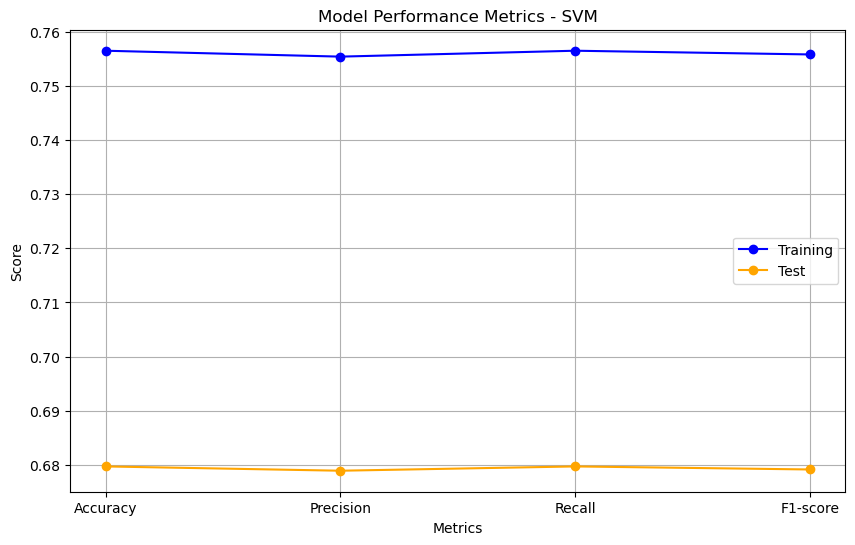

In [5]:
import matplotlib.pyplot as plt

# Data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_scores = [train_accuracy_svm, train_precision_svm, train_recall_svm, train_f1_svm]
test_scores = [test_accuracy_svm, test_precision_svm, test_recall_svm, test_f1_svm]

# Plotting
plt.figure(figsize=(10, 6))

# Plot training scores
plt.plot(metrics, train_scores, marker='o', label='Training', color='blue')

# Plot test scores
plt.plot(metrics, test_scores, marker='o', label='Test', color='orange')

# Add labels and title
plt.title('Model Performance Metrics - SVM')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
